<a href="https://colab.research.google.com/github/udayameister/TensorFlow-for-Machine-Learning-/blob/main/NN_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.18.0
9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.003921

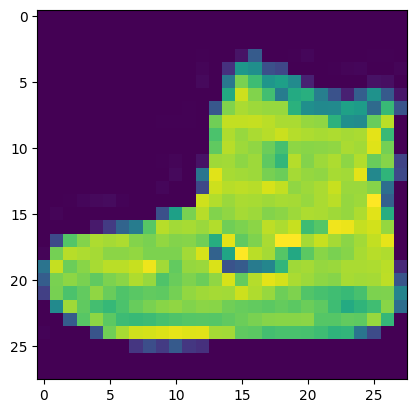

In [86]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist # load dataset

#(training_img, training_label), (test_img, test_label) = mnist.load_data() #traininga and test
import matplotlib.pyplot as plt
plt.imshow(training_img[0])
print(training_label[0])
print(training_img[0])

mnist = tf.keras.datasets.fashion_mnist # load dataset

(training_img, training_label), (test_img, test_label) = mnist.load_data() #traininga and test
class CB(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.90):
      print("\n reached 90% accuracy so cancelling training!")
      self.model.stop_trainig = True

c=CB()

#Normalaization
training_img = training_img / 255.0
test_img = test_img / 255.0

model=tf.keras.models.Sequential([tf.keras.layers.Flatten(), #it generates 1D vector
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), #hidden layer1
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), #hidden layer2
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) #Labeling layer

model.compile(optimizer=tf.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.fit(training_img, training_label, epochs=20,callbacks=[c])

In [87]:
model.evaluate(test_img, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.3955


[0.38486385345458984, 0.8833000063896179]

In [88]:
predictions = model.predict(test_img)
print(predictions[10]) # predicted value of the first image

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[3.1605775e-06 5.1850327e-07 5.2839607e-02 4.0791526e-10 9.3860626e-01
 1.8661594e-09 8.5503580e-03 4.6235907e-10 1.8823787e-09 6.2465605e-10]
